In [5]:
from pytube import YouTube
from moviepy.editor import *

In [6]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import moviepy.editor as mp
import re

In [7]:
import os
from PIL import Image
import pathlib
import csv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import keras
# from keras import layers
# from keras import layers
# from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
dataset = pd.read_csv('balanced_train_segments.csv', delimiter=', ', header=2)
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'balanced_train_segments.csv'

In [88]:
dataset['positive_labels']

def explode_columns(x):
    x = x.strip('"')
    x = x.split(',')
    return x

dataset['recorded_labels'] = dataset['positive_labels'].map(explode_columns)
dataset.head()



,# YTID,start_seconds,end_seconds,positive_labels,recorded_labels
0,--PJHxphWEs,30.0,40.0,"""/m/09x0r,/t/dd00088""","[/m/09x0r, /t/dd00088]"
1,--ZhevVpy1s,50.0,60.0,"""/m/012xff""",[/m/012xff]
2,--aE2O5G5WE,0.0,10.0,"""/m/03fwl,/m/04rlf,/m/09x0r""","[/m/03fwl, /m/04rlf, /m/09x0r]"
3,--aO5cdqSAg,30.0,40.0,"""/t/dd00003,/t/dd00005""","[/t/dd00003, /t/dd00005]"
4,--aaILOrkII,200.0,210.0,"""/m/032s66,/m/073cg4""","[/m/032s66, /m/073cg4]"


In [91]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(dataset['recorded_labels'])
mlb.classes_[0:10]

array(['/g/122z_qxw', '/m/011k_j', '/m/01280g', '/m/012f08', '/m/012n7d',
       '/m/012ndj', '/m/012xff', '/m/0130jx', '/m/013y1f', '/m/0140xf'],
      dtype=object)

## We need to figure out the pipeline
What I'm thinking:
- iterate through dataset
- download audio file for each video, to mp3, extract meaningful features, append to new dataframe
- if error, remove row from dataset
- clean up after each iteration

In [4]:
path = "/Users/joshbernd/Desktop/gal_notes/Capstone/CNN-Instrument-Classification/"
for video in dataset['# YTID']:
    print(video)
    
    filename = download_video(str(video), path)
    mp3, mp4 = to_mp3(path, video)
    
    
    
    break
    
    

NameError: name 'dataset' is not defined

## Downloading youtube audio file

In [2]:
def download_video(vid, folder):
    link = 'https://www.youtube.com/watch?v=' + vid
    folder = folder + "mp4"
    y = YouTube(link)
    t = y.streams.filter(only_audio=True).all()
    t[0].download(output_path=folder)
    
    return os.path.basename(os.path.normpath("/Users/joshbernd/Desktop/gal_notes/Capstone/CNN-Instrument-Classification/mp4/" + str(vid)))
    



# youtube_link = 'https://www.youtube.com/watch?v=x6zypc_LhnM'
# download_folder = "/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/downloaded_videos"
 
# y = YouTube(youtube_link)
# t = y.streams.filter(only_audio=True).all()
# t[0].download(output_path=download_folder)

## Converting mp4 files to mp3

In [3]:
def to_mp3(path, vid):
    for file in [n for n in os.listdir(path) if re.search('mp4',n)]:
        full_path = os.path.join(path, file)
#        output_path = os.path.join(download_folder, os.path.splitext(file)[0] + '.mp3')
        output_path = os.path.join(path, str(vid) + '.mp3')
        
        clip = mp.AudioFileClip(full_path).subclip(10,) # disable if do not want any clipping
        clip.write_audiofile(output_path)
        
        return output_path, full_path


# for file in [n for n in os.listdir(download_folder) if re.search('mp4',n)]:
#     full_path = os.path.join(download_folder, file)
#     output_path = os.path.join(download_folder, os.path.splitext(file)[0] + '.mp3')
#     clip = mp.AudioFileClip(full_path).subclip(10,) # disable if do not want any clipping
#     clip.write_audiofile(output_path)

In [20]:
data, sr = librosa.load('downloaded_videos/Vince Guaraldi Trio - Linus And Lucy.mp4')

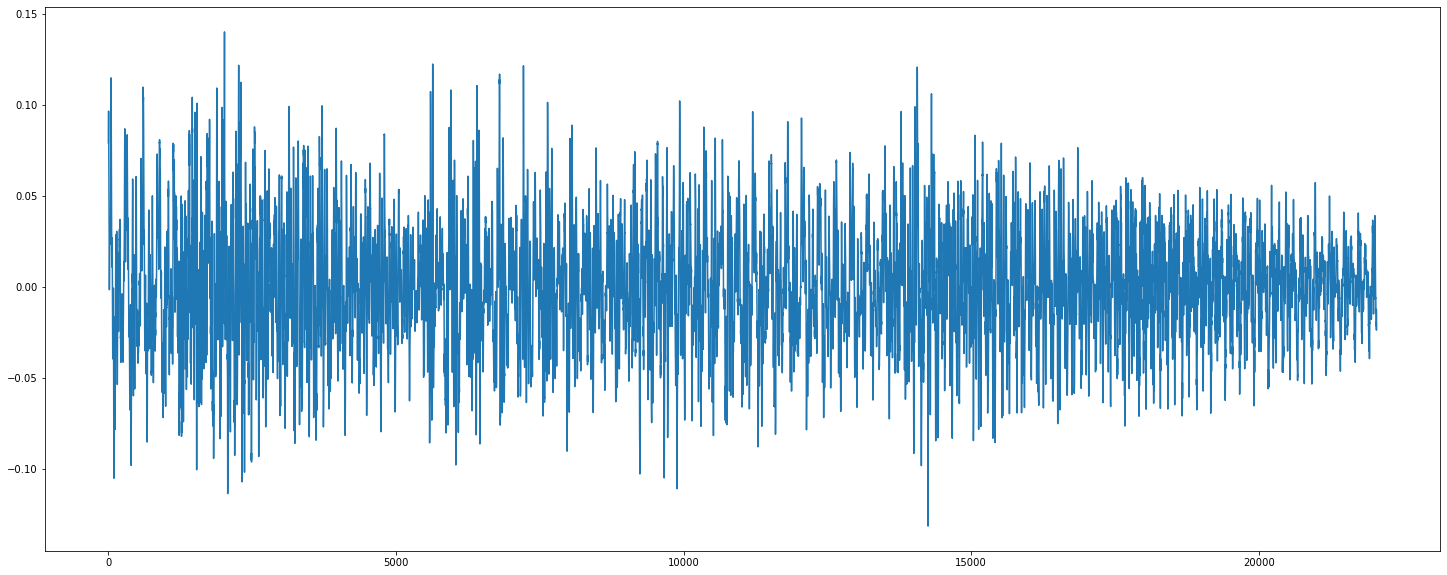

In [21]:
a = int(sr/2)
b = int(sr*(3/2))
fig, ax = plt.subplots(figsize = (25, 10))
snippet = data[sr*5:sr*6]
ax.plot(snippet)

## Save audio as spectrogram.png

In [52]:
def get_audio(file, start, stop):
    '''
    parameters:
        file: str, location of audio filein mp3 audio file
        start: beggining of clip in seconds
        stop: end of clip in seconds
    returns:
        tuple
        data: numpy array
        sr: int
    '''
    data, sr = librosa.load(file, mono=True)
    data = data[sr*start:sr*stop]
    return (data, sr)

def get_spec(lib_file):
    cmap = plt.get_cmap('inferno')
    plt.figure(figsize=(8,8))
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, 
                 noverlap=128, cmap=cmap, 
                 sides='default', mode='default', 
                 scale='dB');
    plt.axis('off')
    plt.savefig(f'/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/img/{filename[:-3].replace(".", "")}.png')
    plt.clf()
    
    
def trim(y, sr, start, stop):
    y = y[sr*start:sr*stop]


    
    
data = get_audio('/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/downloaded_videos/Vince Guaraldi Trio - Linus And Lucy.mp3', 5, 15)[0]    
get_spec(data)

<Figure size 576x576 with 0 Axes>

## Creating a header for the CSV file

In [54]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

## 5. Extracting features from Spectrogram: 
1 - Mel-frequency cepstral coefficients (MFCC) 

2 - Spectral Centroid

3 - Zero Crossing Rate

4 - Chroma Frequencies

5 - Spectral Roll-off.

In [71]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    
for filename in os.listdir('/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/downloaded_videos'):
    songname = f'/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/downloaded_videos/{filename}'
    if songname != '/Users/joshbernd/Desktop/gal_notes/Capstone/Capstone_2/downloaded_videos/.DS_Store':
        y, sr = librosa.load(songname, mono=True)
        y = y[sr*5:sr*15]
        #y = trim(y, sr, start, stop)
    
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [73]:
df = pd.read_csv('dataset.csv')
df.head()

,,,,,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
Vince,Guaraldi,Trio,-,Linus,And,Lucy.mp3,0.357314,0.046954,1626.188013,2124.733327,3525.574892,0.059534,-218.986008,128.787918,...,-4.290437,2.700953,1.095532,9.068378,-2.693775,0.709828,-8.646826,-1.605001,-2.268581,1.377728
YODELING,operatic,contralto,-,SCHUMANN-HEINK,-,Millocker.mp3,0.235266,0.063707,1634.807384,1728.291354,2755.900273,0.084563,-235.130615,119.952728,...,-9.721482,-6.118115,-4.388252,1.663077,-13.528563,-7.598403,-9.350527,-1.323423,0.994131,4.765371
